In [1]:
"""
Test Notebook for EAZY Photometric Redshift Analysis
====================================================

This notebook demonstrates how to use the EAZY photometric redshift code 
with the SMACS cluster data catalog.

Data Format
-----------
The catalog file 'smacs_update_iso_err_zspec.cat' contains photometric data
in ASCII format with the following columns:

Column Order:
1.  ID (object identifier)
2.  ACS F435W flux
3.  ACS F435W flux error
4.  ACS F606W flux
5.  ACS F606W flux error
6.  ACS F814W flux
7.  ACS F814W flux error
8.  WFC3 F125W flux
9.  WFC3 F125W flux error
10. WFC3 F140W flux
11. WFC3 F140W flux error
12. WFC3 F160W flux
13. WFC3 F160W flux error
14. Spectroscopic redshift (z_spec)

Missing data is represented by -99.0 values.

Usage Examples
--------------
"""

"\nTest Notebook for EAZY Photometric Redshift Analysis\n====================================================\n\nThis notebook demonstrates how to use the EAZY photometric redshift code \nwith the SMACS cluster data catalog.\n\nData Format\n-----------\nThe catalog file 'smacs_update_iso_err_zspec.cat' contains photometric data\nin ASCII format with the following columns:\n\nColumn Order:\n1.  ID (object identifier)\n2.  ACS F435W flux\n3.  ACS F435W flux error\n4.  ACS F606W flux\n5.  ACS F606W flux error\n6.  ACS F814W flux\n7.  ACS F814W flux error\n8.  WFC3 F125W flux\n9.  WFC3 F125W flux error\n10. WFC3 F140W flux\n11. WFC3 F140W flux error\n12. WFC3 F160W flux\n13. WFC3 F160W flux error\n14. Spectroscopic redshift (z_spec)\n\nMissing data is represented by -99.0 values.\n\nUsage Examples\n--------------\n"

In [2]:
import pandas as pd
import Eazybox_llm as eazyllm

In [ ]:
# Generate the translation file
catfile='/Users/lailimin/eazy-photoz-master/photoz_eazy/smacs_update_iso_err_zspec.cat'
eazyllm.translate_config(catfile)

In [ ]:
# Generate config file
eazyllm.zphot_config(catfile,'./test',temperr=0.03,syserr=0.01,prior=0,zp_offsets=0,fixspecz=0,configfile='./zphot.param',eazypath='/Applications/eazy-photoz-master/',template_file='/Users/lailimin/eazy-photoz-master/templates/fsps_full/tweak_fsps_QSF_12_v3.param')
# You can modify the config file manually after running this script

In [ ]:
# Run EAZY
eazyllm.run_eazy(eazypath='/Applications/eazy-photoz-master/') 

Generating template grid >>>>>>>>>>> Done.


EAZY, version 2015-05-08

Control files:
    param = zphot.param
translate = zphot.translate
zeropoint = zphot.zeropoint

Reading in program parameters...

FILTERS_RES: /Applications/eazy-photoz-master//filters/FILTER.RES.latest
FILTER_FORMAT: 1
SMOOTH_FILTERS: 0
SMOOTH_SIGMA: 50.000000
TEMPLATES_FILE: /Users/lailimin/eazy-photoz-master/templates/fsps_full/tweak_fsps_QSF_12_v3.param
TEMPLATE_COMBOS: 9
NMF_TOLERANCE: 0.000100
WAVELENGTH_FILE: templates/uvista_nmf/lambda.def
TEMP_ERR_FILE: templates/uvista_nmf/template_error_10.def
TEMP_ERR_A2: 0.030000
SYS_ERR: 0.010000
APPLY_IGM: 1
LAF_FILE: templates/LAFcoeff.txt
DLA_FILE: templates/DLAcoeff.txt
SCALE_2175_BUMP: 0.000000
DUMP_TEMPLATE_CACHE: 0
USE_TEMPLATE_CACHE: 0
CACHE_FILE: photz.tempfilt
CATALOG_FILE: /Users/lailimin/eazy-photoz-master/photoz_eazy/smacs_update_iso_err_zspec.cat
MAGNITUDES: 0
NOT_OBS_THRESHOLD: -90.000000
N_MIN_COLORS: 4
OUTPUT_DIRECTORY: ./test
MAIN_OUTPUT_FILE: photz
PRINT_ERRORS: 1
CHI2_SCALE: 1.000000
VERBOSE_L

# Example analysis plots:

set1:  (168,)


<Axes: ylabel='$z_{best}$'>

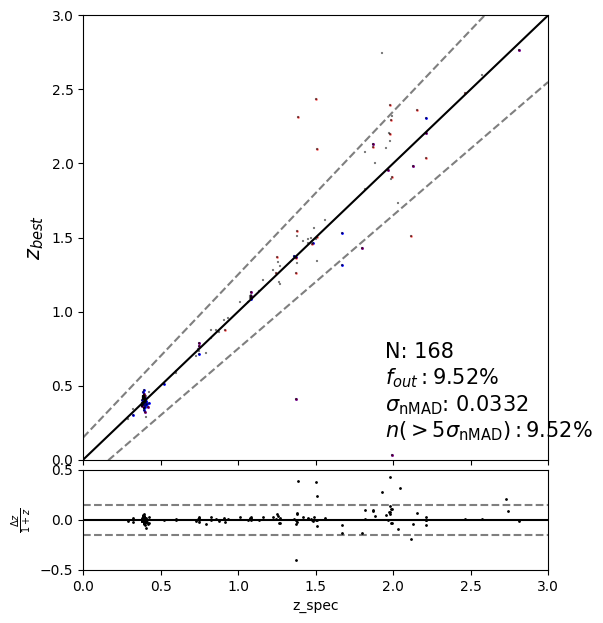

In [10]:
zout = eazyllm.EAzy_analysis(outputdir='./test',outputfile='photz',cache_file=None)
zout.show_photz_compare(zmax=3,set1label='z_spec')

<Axes: xlabel='$z_{best}$', ylabel='N'>

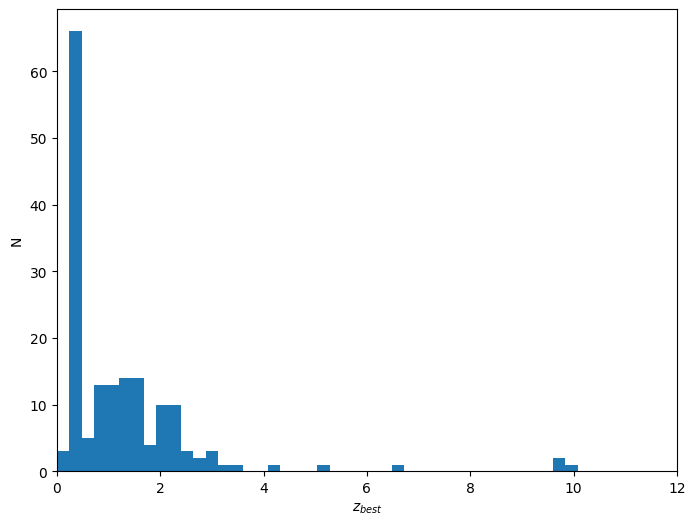

In [12]:
zout.show_zhist1d(zmax=12)

<Axes: >

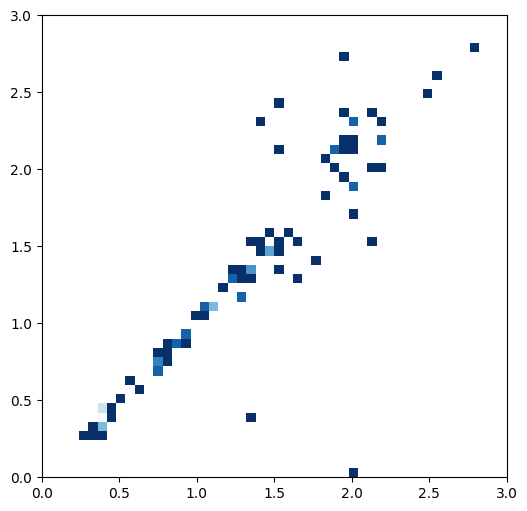

In [17]:
# For better present the number density in each redshift bin
zout.show_zhist2d(zmax=3,)

array([<Axes: xlabel='Wavelength ($\\AA$)', ylabel='$f_{\\lambda}$'>,
       <Axes: xlabel='z', ylabel='p(z)'>], dtype=object)

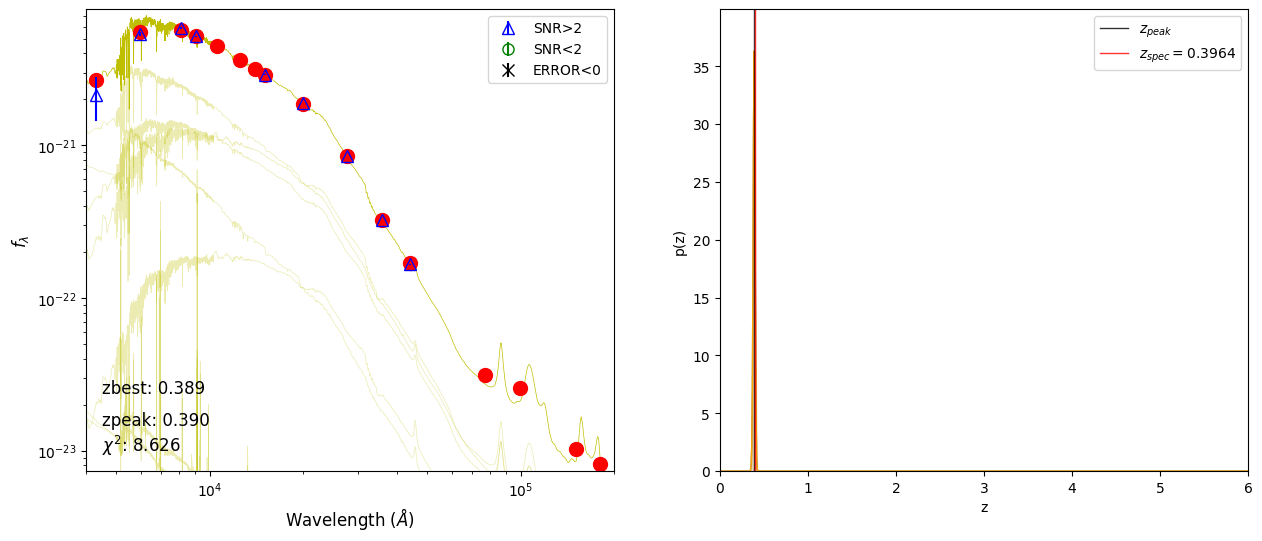

In [11]:
zout.show_fitting(0,specz=zout.z_spec[0],zrange=(0,6),xrange=(4000,200000))